In [1]:
%%time
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

CPU times: user 8.04 s, sys: 2.24 s, total: 10.3 s
Wall time: 21.5 s


In [2]:
mat_contents = sio.loadmat('/Users/XanderFarnum/Desktop/Cell_Culture_RMS_Master.mat')
# Date = mat_contents['Date']

Ca922_data = np.transpose(np.mean(mat_contents['Ca922_RMS_data_filt'],axis=(1,2)))
HaCat_data = np.transpose(np.mean(mat_contents['HaCat_RMS_data_filt'],axis=(1,2)))
HSC3_data = np.transpose(np.mean(mat_contents['HSC3_RMS_data_filt'],axis=(1,2)))
Media_data = np.transpose(np.mean(mat_contents['Media_RMS_data_filt'],axis=(1,2)))
SAS_data = np.transpose(np.mean(mat_contents['SAS_RMS_data_filt'],axis=(1,2)))

Ca922_class = np.ones((np.size(Ca922_data, axis=0),1))*0
HaCat_class = np.ones((np.size(HaCat_data, axis=0),1))*1
HSC3_class = np.ones((np.size(HSC3_data, axis=0),1))*2
Media_class = np.ones((np.size(Media_data, axis=0),1))*3
SAS_class = np.ones((np.size(SAS_data, axis=0),1))*4

In [3]:
# Use for binary (2 class) classification

binclass_data = np.concatenate((Ca922_data,HaCat_data),axis=0)
binclass_stimuli = np.concatenate((Ca922_class,HaCat_class),axis=0)
X_train, X_test, y_train, y_test = train_test_split(binclass_data,binclass_stimuli,test_size=0.2,random_state=0)

In [4]:
# Use for multi-class (>2 classes) classification

multiclass_data = np.concatenate((Ca922_data,HaCat_data,HSC3_data,Media_data,SAS_data),axis=0)
multiclass_stimuli = np.concatenate((Ca922_class,HaCat_class,HSC3_class,Media_class,SAS_class),axis=0)
X_train, X_test, y_train, y_test = train_test_split(multiclass_data,multiclass_stimuli,test_size=0.2,random_state=0)

In [5]:
# Format and preprocess data

y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train_norm = preprocessing.scale(X_train)
X_test_norm = preprocessing.scale(X_test)

# Construct one-hot target vector representations

y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
y_train_onehot[np.arange(y_train.size),np.transpose(y_train)] = 1

y_test_onehot = np.zeros((y_test.size, y_test.max()+1))
y_test_onehot[np.arange(y_test.size),np.transpose(y_test)] = 1

## Binary Classification

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu', input_dim=np.size(X_train,axis=1))) # First hidden layer
model.add(Dense(16,activation='relu')) # Second hidden layer
model.add(Dense(1,activation='sigmoid')) # Sigmoid output layer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile model
model.fit(X_train,y_train, epochs=10) # Train model
          
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: ", (scores[1]*100))
          
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: ", (scores[1]*100))

predict_x=model.predict(X_test) 
y_pred = np.round(predict_x).astype(int)

c_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(c_matrix, annot=True,
                xticklabels=['Ca922','HaCat'],
                yticklabels=['Ca922','HaCat'],
                cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Multi-class Classification

2022-01-24 17:19:22.531181: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
25/25 [==============================] - 1s 8ms/step - loss: 4.7344 - accuracy: 0.2075
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 1.7286 - accuracy: 0.2237
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 1.4814 - accuracy: 0.2825
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.3988
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 1.2978 - accuracy: 0.4625
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 1.1910 - accuracy: 0.5000
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.5412
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 1.0127 - accuracy: 0.6413
Epoch 9/30
25/25 [==============================] - 0s 4ms/step - loss: 0.9284 - accuracy: 0.6925
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.7088
Epoch 11/30
25/25 [

Text(33.0, 0.5, 'Actual')

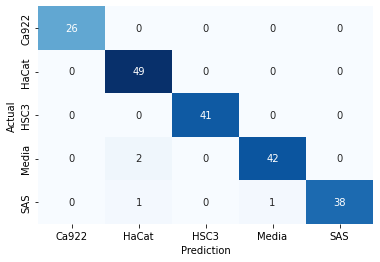

In [6]:
model = Sequential()
model.add(Dense(40,activation='relu', input_dim=np.size(X_train,axis=1))) # First hidden layer
model.add(Dense(16,activation='relu')) # Second hidden layer
model.add(Dense(5,activation='softmax')) # Softmax output layer
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Compile model
model.fit(X_train,y_train_onehot, epochs=30) # Train model
          
scores = model.evaluate(X_train,y_train_onehot)
print("Training Accuracy: ", (scores[1]*100))
          
scores = model.evaluate(X_test,y_test_onehot)
print("Testing Accuracy: ", (scores[1]*100))

predict_x=model.predict(X_test) 
y_pred = np.argmax(predict_x,axis=1,keepdims=True)

c_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(c_matrix, annot=True,
                xticklabels=['Ca922','HaCat','HSC3','Media','SAS'],
                yticklabels=['Ca922','HaCat','HSC3','Media','SAS'],
                cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Multi-class Classification with K-fold Cross Validation

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=np.size(X_train,axis=1))) # First hidden layer
    model.add(Dense(16,activation='relu')) # Second hidden layer
    model.add(Dense(5, activation='softmax')) #Softmax output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(model=baseline_model, epochs=30)
kfold = KFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, X_train, y_train_onehot, cv=kfold)
results = cross_val_score(estimator, X_train, y_train_onehot)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))